# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2


## Actividad en clase

Usando el algoritmo **RandomForest**, **AdaBoost** y **Stacking**, haga lo siguiente:

- Trabaje con las particiones training/testing del dataset **20newsgroups**. 
- Use un vectorizador **TfidfVectorizer** con min_df = 5, ngram_range = (1, 2) y max_features = 50000. Elimine stopwords en Inglés y pase todo a minúscula. 
- Ajuste el clasificador **RandomForest** de manera que al menos obtenga un **60%** de accuracy. Cuide que su modelo no sea muy complejo.
- Muestre el classification report del clasificador.
- Ajuste el clasificador **AdaBoost** de manera que al menos obtenga un **40%** de accuracy. Cuide que su modelo no sea muy complejo.
- Muestre el classification report del clasificador.
- Muestre la curva de staged predict de AdaBoost.
- Construya un clasificador de **stacking** en base a los dos clasificadores anteriores.
- Muestre el classification report del clasificador.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que cada L es una décima más en la nota de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


- Vea documentación del TfidfVectorizer en: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# Solución

In [1]:
from sklearn.datasets import fetch_20newsgroups

X_train_text, y_train = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'), return_X_y=True)
X_test_text, y_test  = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'), return_X_y=True)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vc = TfidfVectorizer(min_df = 5, max_features = 50000, analyzer = "word", ngram_range = (1, 2), stop_words = 'english', lowercase = True)
train_vc = tfidf_vc.fit_transform(X_train_text)
test_vc = tfidf_vc.transform(X_test_text)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf1 = RandomForestClassifier(min_samples_split=50, n_estimators=100, random_state=0)
clf1.fit(train_vc, y_train)
y_pred = clf1.predict(test_vc)
metrics.accuracy_score(y_test, y_pred)

0.6182952734997345

In [4]:
labels = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names = labels))

                          precision    recall  f1-score   support

             alt.atheism       0.46      0.35      0.40       319
           comp.graphics       0.59      0.61      0.60       389
 comp.os.ms-windows.misc       0.58      0.63      0.60       394
comp.sys.ibm.pc.hardware       0.57      0.61      0.59       392
   comp.sys.mac.hardware       0.66      0.62      0.64       385
          comp.windows.x       0.72      0.64      0.68       395
            misc.forsale       0.71      0.71      0.71       390
               rec.autos       0.42      0.69      0.52       396
         rec.motorcycles       0.71      0.65      0.68       398
      rec.sport.baseball       0.71      0.73      0.72       397
        rec.sport.hockey       0.78      0.83      0.81       399
               sci.crypt       0.78      0.64      0.70       396
         sci.electronics       0.49      0.44      0.46       393
                 sci.med       0.69      0.68      0.68       396
         

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=15, random_state=0)
clf2.fit(train_vc, y_train)
y_pred = clf2.predict(test_vc)
metrics.accuracy_score(y_test, y_pred)

0.4340148698884758

In [19]:
print(metrics.classification_report(y_test, y_pred, target_names = labels))

                          precision    recall  f1-score   support

             alt.atheism       0.41      0.28      0.33       319
           comp.graphics       0.39      0.48      0.43       389
 comp.os.ms-windows.misc       0.56      0.41      0.47       394
comp.sys.ibm.pc.hardware       0.49      0.40      0.44       392
   comp.sys.mac.hardware       0.58      0.43      0.50       385
          comp.windows.x       0.68      0.52      0.59       395
            misc.forsale       0.60      0.54      0.56       390
               rec.autos       0.76      0.38      0.51       396
         rec.motorcycles       0.86      0.44      0.58       398
      rec.sport.baseball       0.13      0.71      0.22       397
        rec.sport.hockey       0.70      0.55      0.61       399
               sci.crypt       0.75      0.48      0.59       396
         sci.electronics       0.34      0.25      0.29       393
                 sci.med       0.69      0.31      0.43       396
         

In [20]:
from sklearn.metrics import accuracy_score

test_errors = []

for test_predict in clf2.staged_predict(test_vc):
    test_errors.append(1.0 - accuracy_score(test_predict, y_test))
    

Text(0.5, 0, 'Number of Trees')

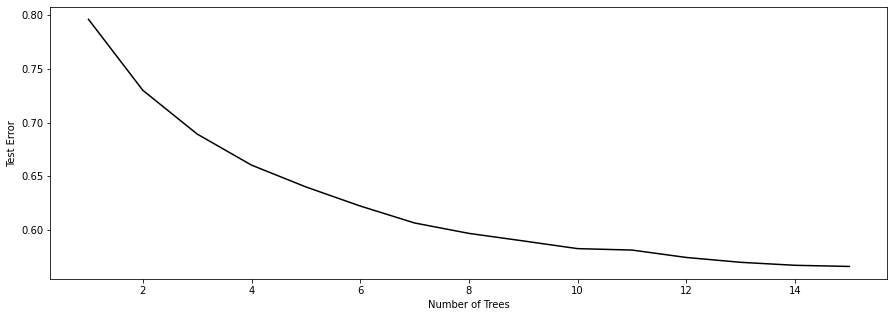

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(range(1, len(clf2) + 1), test_errors, c="black")
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

In [22]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(min_samples_split=50, n_estimators=100, random_state=0)), 
              ('ada-50', AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=15, random_state=0))]
    

clf = StackingClassifier(estimators=estimators)
clf.fit(train_vc, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(min_samples_split=50,
                                                       random_state=0)),
                               ('ada-50',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                                                   n_estimators=15,
                                                   random_state=0))])

In [23]:
y_pred = clf.predict(test_vc)
metrics.accuracy_score(y_test, y_pred)

0.6216144450345193

In [24]:
print(metrics.classification_report(y_test, y_pred, target_names = labels))

                          precision    recall  f1-score   support

             alt.atheism       0.44      0.46      0.45       319
           comp.graphics       0.54      0.65      0.59       389
 comp.os.ms-windows.misc       0.63      0.57      0.60       394
comp.sys.ibm.pc.hardware       0.57      0.60      0.59       392
   comp.sys.mac.hardware       0.69      0.62      0.65       385
          comp.windows.x       0.78      0.63      0.70       395
            misc.forsale       0.77      0.69      0.73       390
               rec.autos       0.42      0.69      0.52       396
         rec.motorcycles       0.70      0.66      0.68       398
      rec.sport.baseball       0.70      0.76      0.73       397
        rec.sport.hockey       0.87      0.79      0.83       399
               sci.crypt       0.84      0.64      0.72       396
         sci.electronics       0.42      0.51      0.46       393
                 sci.med       0.69      0.69      0.69       396
         